# Problem Statement

    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

    The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

### Business Goal 

 

    You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Steps**

* Loading and Understanding the data
* Data Cleaning
* Data Visualization
* Model Building 
* Model Evaluation

### Loading and Understanding the Data

While Building the Model Loading, It is initial steps to Understand flow of the Data

Here we do:

    Importing the important libraries
    Loading the Data
    Perform some Statistical operation

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # This library will be used to ignore some warnings
warnings.filterwarnings('ignore')

import calendar
sns.set(style = "darkgrid")

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [363]:
housingdf =  pd.read_csv('/Users/manish.konduri/Desktop/Manish_UpGrad/ML-2/Advanced Regression - Assignment/train.csv')
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [364]:
housingdf.shape

(1460, 81)

**Getting some Important Details of the Dataset**

In [365]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [366]:
housingdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0000,730.5000,421.6100,1.0000,365.7500,730.5000,1095.2500,1460.0000
MSSubClass,1460.0000,56.8973,42.3006,20.0000,20.0000,50.0000,70.0000,190.0000
LotFrontage,1201.0000,70.0500,24.2848,21.0000,59.0000,69.0000,80.0000,313.0000
LotArea,1460.0000,10516.8281,9981.2649,1300.0000,7553.5000,9478.5000,11601.5000,215245.0000
OverallQual,1460.0000,6.0993,1.3830,1.0000,5.0000,6.0000,7.0000,10.0000
OverallCond,1460.0000,5.5753,1.1128,1.0000,5.0000,5.0000,6.0000,9.0000
YearBuilt,1460.0000,1971.2678,30.2029,1872.0000,1954.0000,1973.0000,2000.0000,2010.0000
YearRemodAdd,1460.0000,1984.8658,20.6454,1950.0000,1967.0000,1994.0000,2004.0000,2010.0000
MasVnrArea,1452.0000,103.6853,181.0662,0.0000,0.0000,0.0000,166.0000,1600.0000
BsmtFinSF1,1460.0000,443.6397,456.0981,0.0000,0.0000,383.5000,712.2500,5644.0000


***Initial Steps***

While doing some initial steps in EDA, We can cleary see that some of imortant details

* Our Dataset contains total 1460 Rows and 81 Columns

* While checking the Dataset with info option ,we can clearly see that there is Numerous columns contains Null Values


* Descriptive Statistics

    In Descriptive Statistics we can Clearly See that there is N number of columns has outlier,if we leave outliers it will reduce our Performance

### Cleaning Data

Cleaning the data before building the model is mantatory because, it improves our data quality and increases overall productivity.


**Checking the Missing Values in Dataset**

Here I'm going to check and Handling the missing Values

In [367]:
mis_val = housingdf.isnull().sum()
mis_val_percentage = 100*mis_val/len(housingdf)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

,Missing Values,% of Total Values
PoolQC,1453,99.5205
MiscFeature,1406,96.3014
Alley,1369,93.7671
Fence,1179,80.7534
FireplaceQu,690,47.2603
LotFrontage,259,17.7397
GarageYrBlt,81,5.5479
GarageCond,81,5.5479
GarageType,81,5.5479
GarageFinish,81,5.5479


***Dropping the Variables with High Missing Values***

In [368]:
miss_data_col = ['Alley','PoolQC', 'Fence', 'MiscFeature']
housingdf = housingdf.drop(miss_data_col,axis=1)
housingdf.shape

(1460, 77)

***Checking the Duplicate Values in Data***

In [369]:
# Check for duplicate data
dups = housingdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
housingdf[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [370]:
housingdf = housingdf.drop('Id',axis=1)
housingdf.shape

(1460, 76)

***Checking for Skewness in Target Variable - SalesPrice***

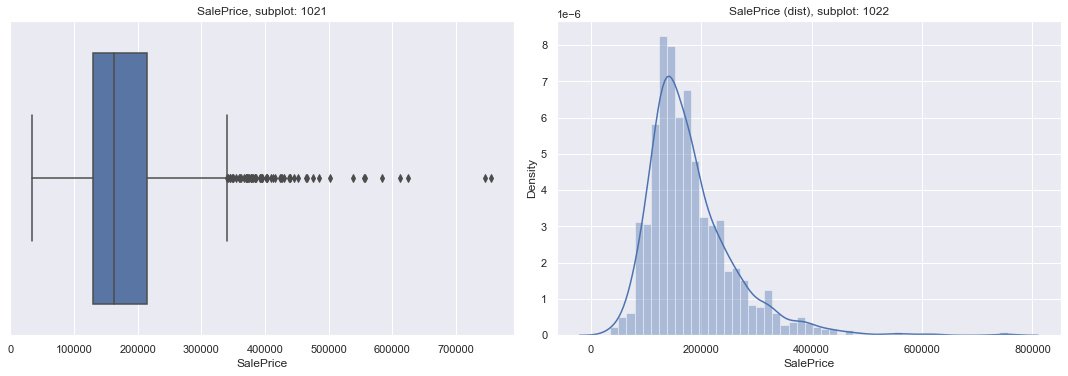

In [371]:
target_col = ['SalePrice']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(housingdf[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(housingdf[i])
    c = c + 1
    
   

plt.tight_layout()
plt.show();

Two observations here - Our target variable contains outliers in the data also it is right skewed - not normally distributed. We will take log transformation on our target variable

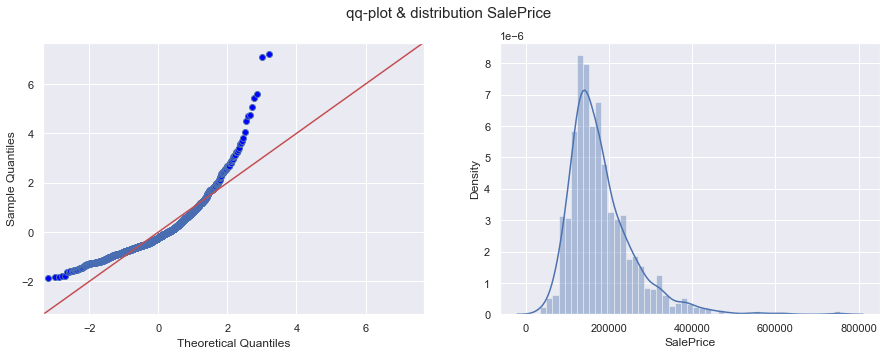

In [372]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(housingdf['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(housingdf['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [373]:
housingdf['SalePrice_log'] = np.log(housingdf['SalePrice'])

In [374]:
saleprice = housingdf[['SalePrice']].copy()
housingdf = housingdf.drop('SalePrice',axis=1) # removing the orignal variable

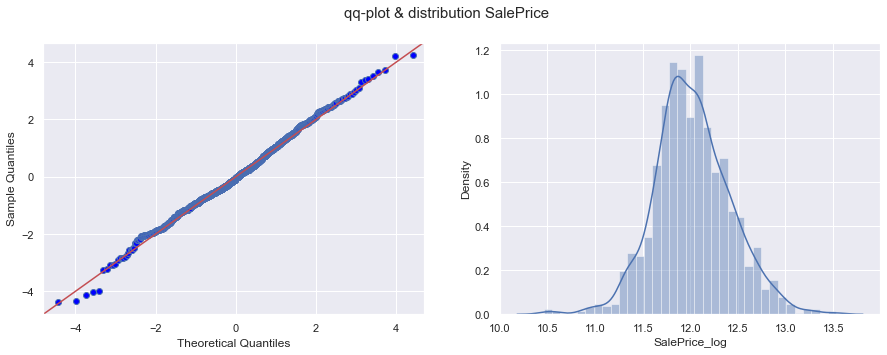

In [375]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(housingdf['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(housingdf['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

## Outliers Detection

In [376]:
num_col = housingdf.select_dtypes(include=np.number).columns.tolist()
num_col[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

In [377]:
num_data = housingdf[num_col]
num_data.shape

(1460, 37)

In [378]:
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
0,60,65.0000,8450,7,5,2003,2003,196.0000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0000,2,548,0,61,0,0,0,0,0,2,2008,12.2477
1,20,80.0000,9600,6,8,1976,1976,0.0000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0000,2,460,298,0,0,0,0,0,0,5,2007,12.1090
2,60,68.0000,11250,7,5,2001,2002,162.0000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0000,2,608,0,42,0,0,0,0,0,9,2008,12.3172
3,70,60.0000,9550,7,5,1915,1970,0.0000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0000,3,642,0,35,272,0,0,0,0,2,2006,11.8494
4,60,84.0000,14260,8,5,2000,2000,350.0000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0000,3,836,192,84,0,0,0,0,0,12,2008,12.4292


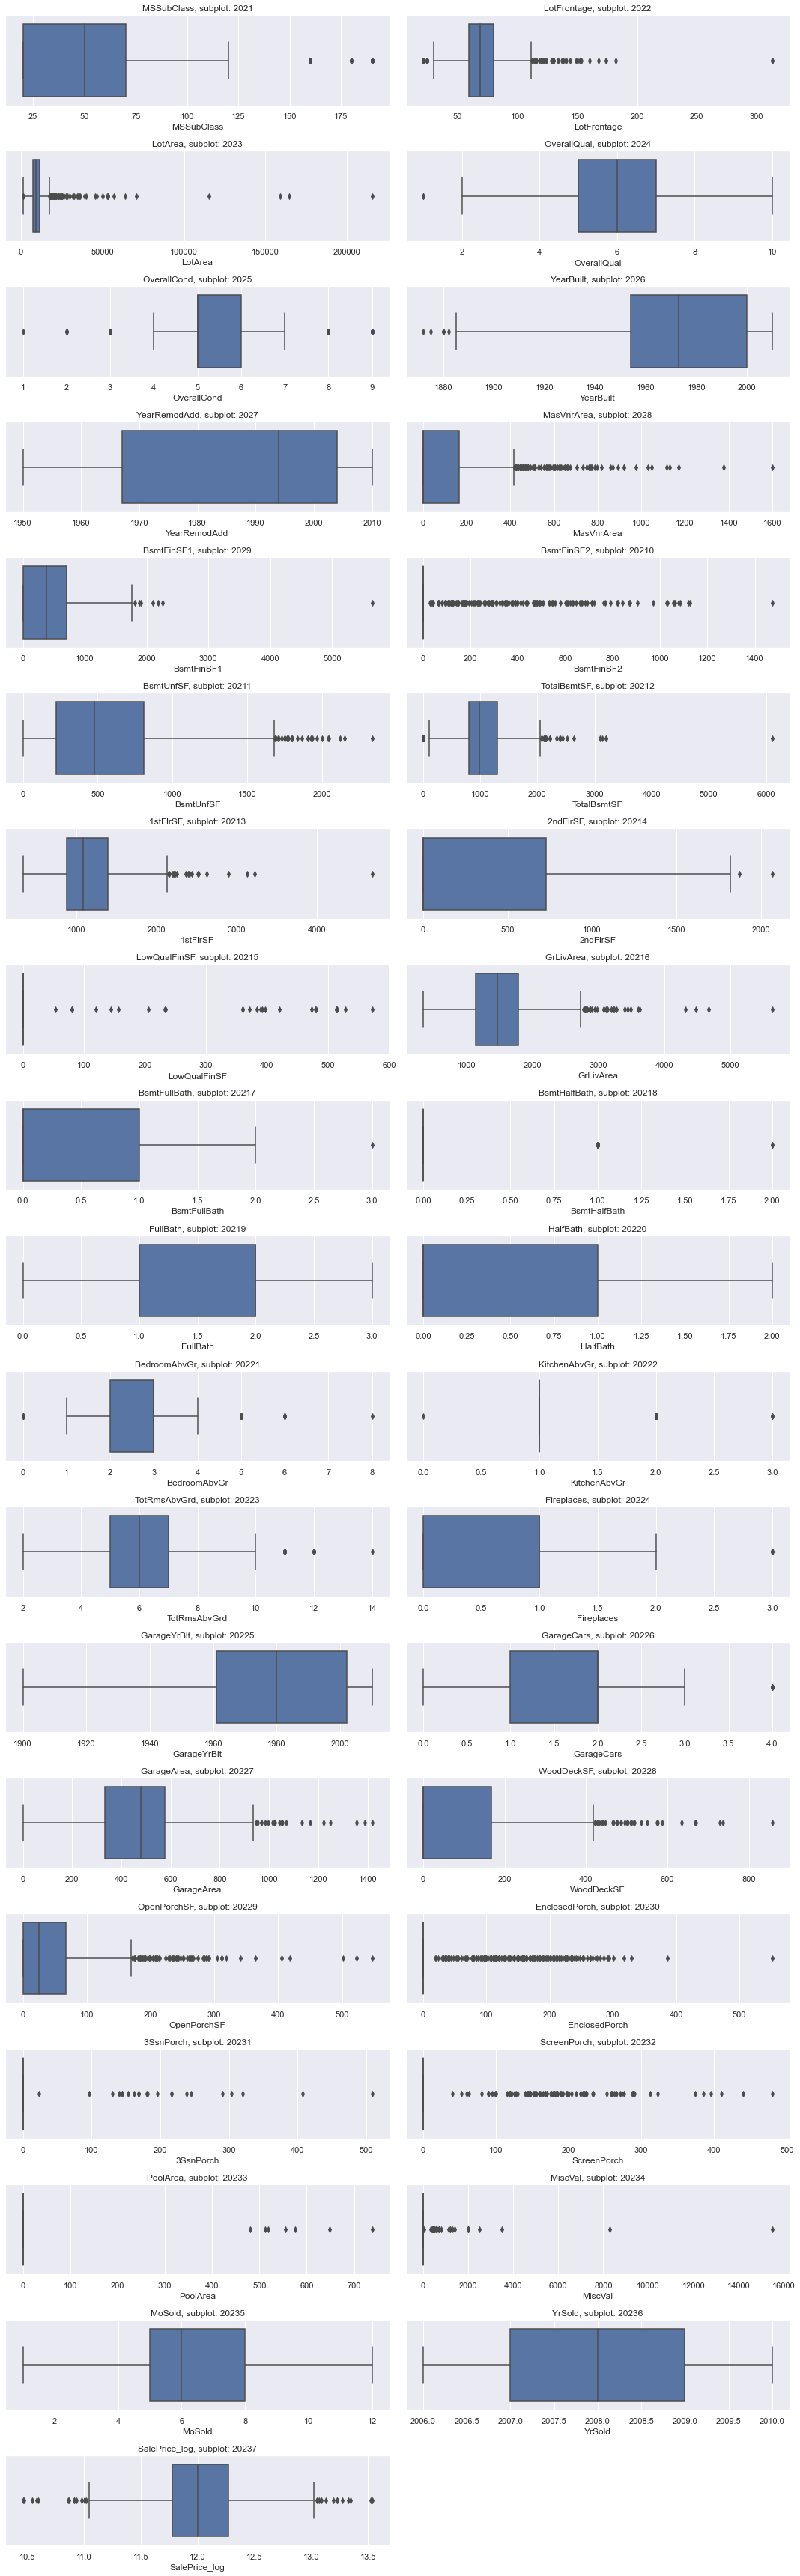

In [379]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

# Treat Missing Values - Presence of Outliers in the data

### Numerical Columns

In [380]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
dtype: int64

In [381]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer

In [382]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [383]:
num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

In [384]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

MSSubClass      0
HalfBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [385]:
print("Shape of the data",num_data.shape)

Shape of the data (1460, 37)


<AxesSubplot:>

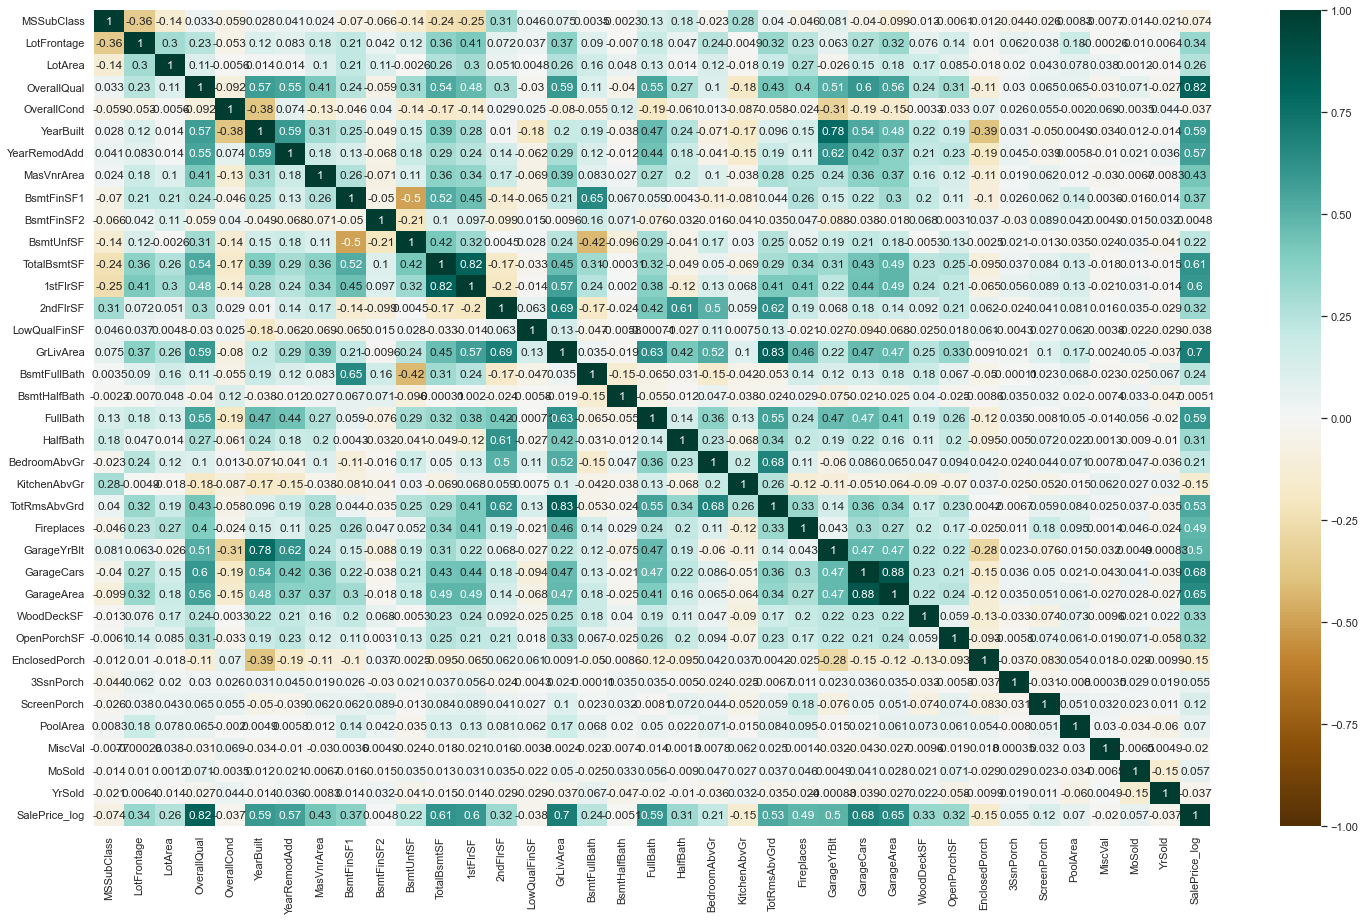

In [386]:
plt.figure(figsize=(25, 15))

sns.heatmap(num_data.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

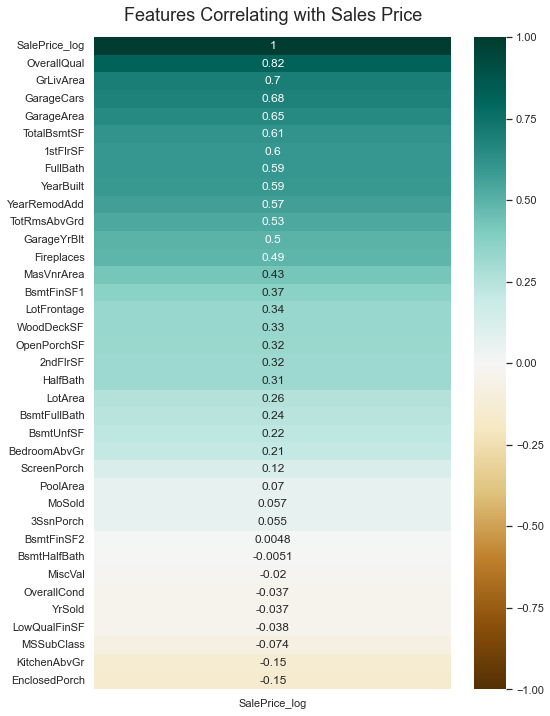

In [387]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [388]:
num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_log'],
      dtype='object')

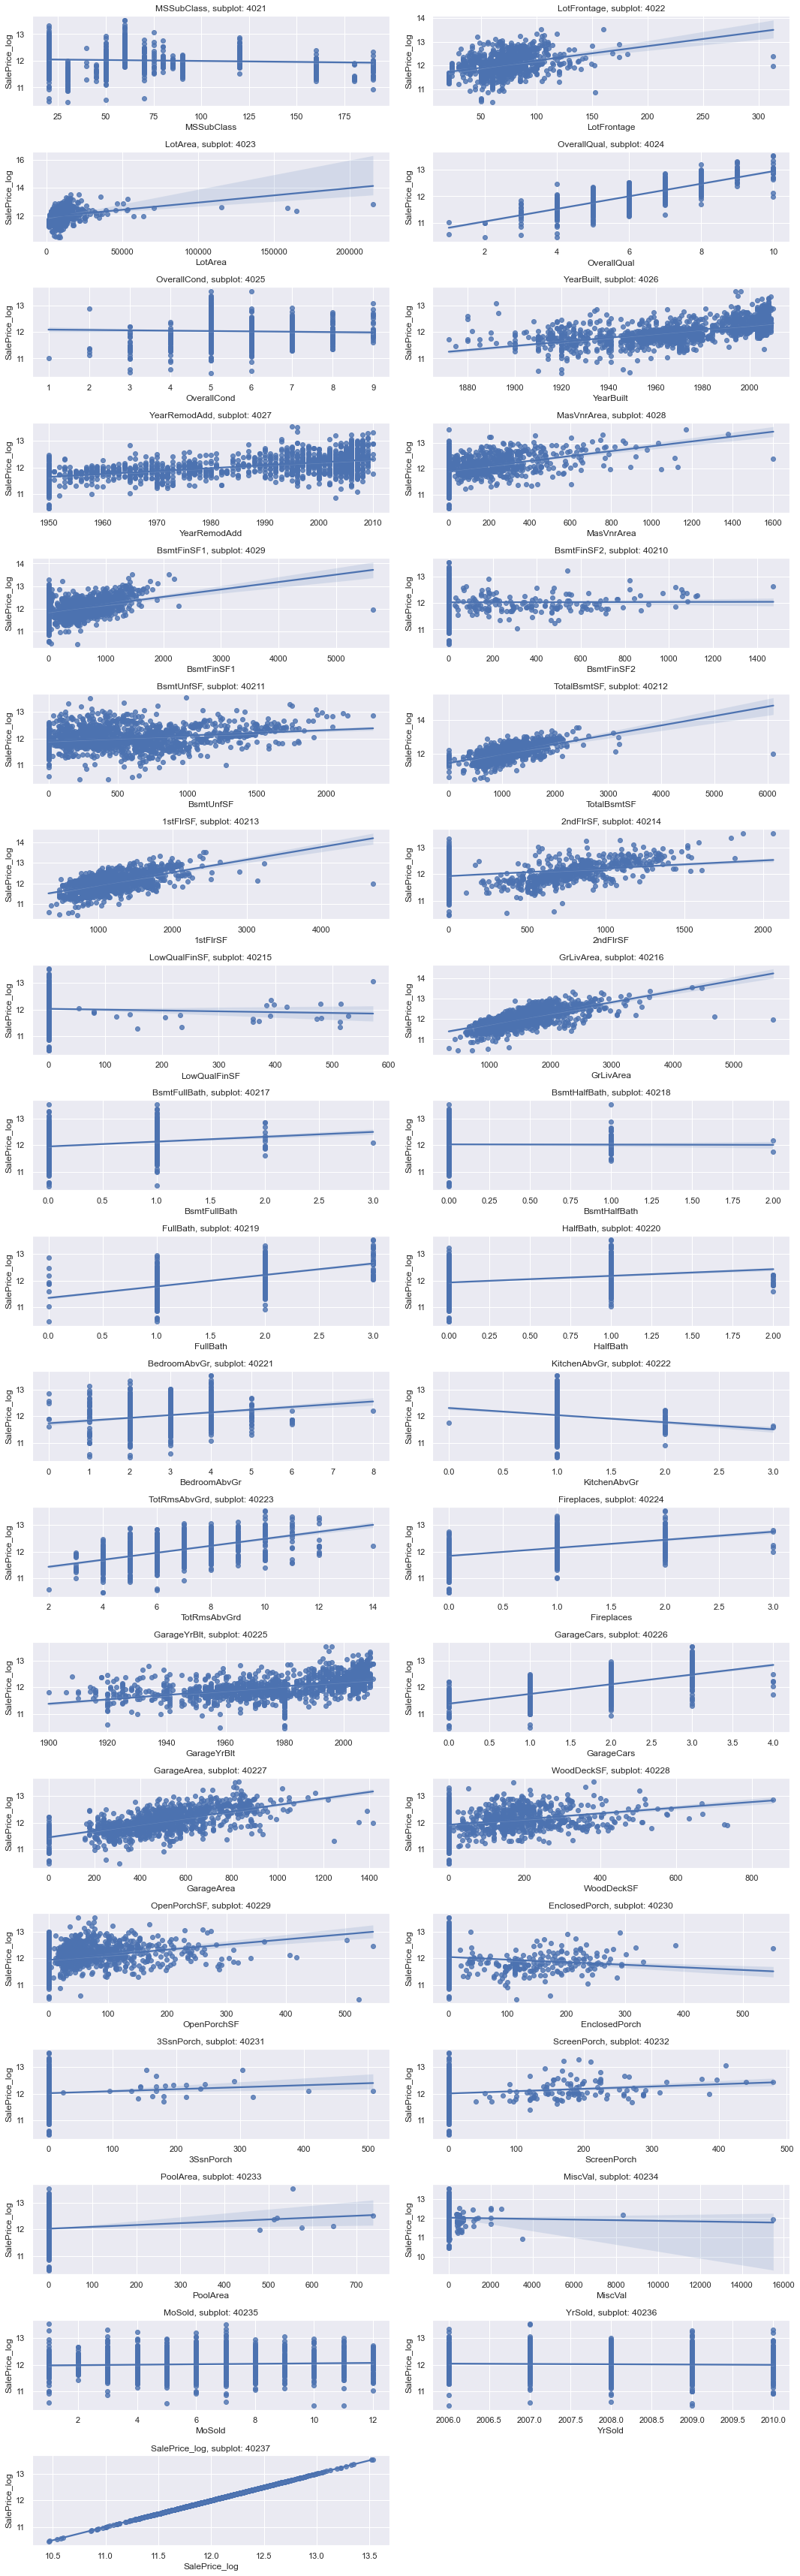

In [389]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.regplot(num_data[i], num_data['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Categorical Variables

In [390]:
cat_col = housingdf.select_dtypes(include=object).columns.tolist()
cat_col[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [391]:
cat_df = housingdf[cat_col]
cat_df.shape

(1460, 39)

In [392]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [393]:
cat_df.isnull().sum().sort_values(ascending=False)[:20]

FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
Heating           0
MSZoning          0
HeatingQC         0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
dtype: int64

In [394]:
cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna('No Fireplace')
cat_df['GarageCond'] = cat_df['GarageCond'].fillna('No GarageCond')
cat_df['GarageQual'] = cat_df['GarageQual'].fillna('No GarageQual')
cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna('No GarageFinish')
cat_df['GarageType'] = cat_df['GarageType'].fillna('No GarageType')

In [395]:
cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna('No BsmtFinType2')
cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna('No BsmtExposure')
cat_df['BsmtCond']     = cat_df['BsmtCond'].fillna('No BsmtCond')
cat_df['BsmtQual']     = cat_df['BsmtQual'].fillna('No BsmtQual')
cat_df['BsmtFinType1'] = cat_df['BsmtFinType1'].fillna('No BsmtFinType1')

In [396]:
cat_df['MasVnrType'] = cat_df['MasVnrType'].fillna('None')
cat_df['Electrical'] = cat_df['Electrical'].fillna(method='ffill')

In [397]:
# Adding Target variable
cat_df = pd.concat([cat_df,num_data[['SalePrice_log']]],axis=1)
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice_log
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal,12.2477
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.1090
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.3172
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.8494
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.4292


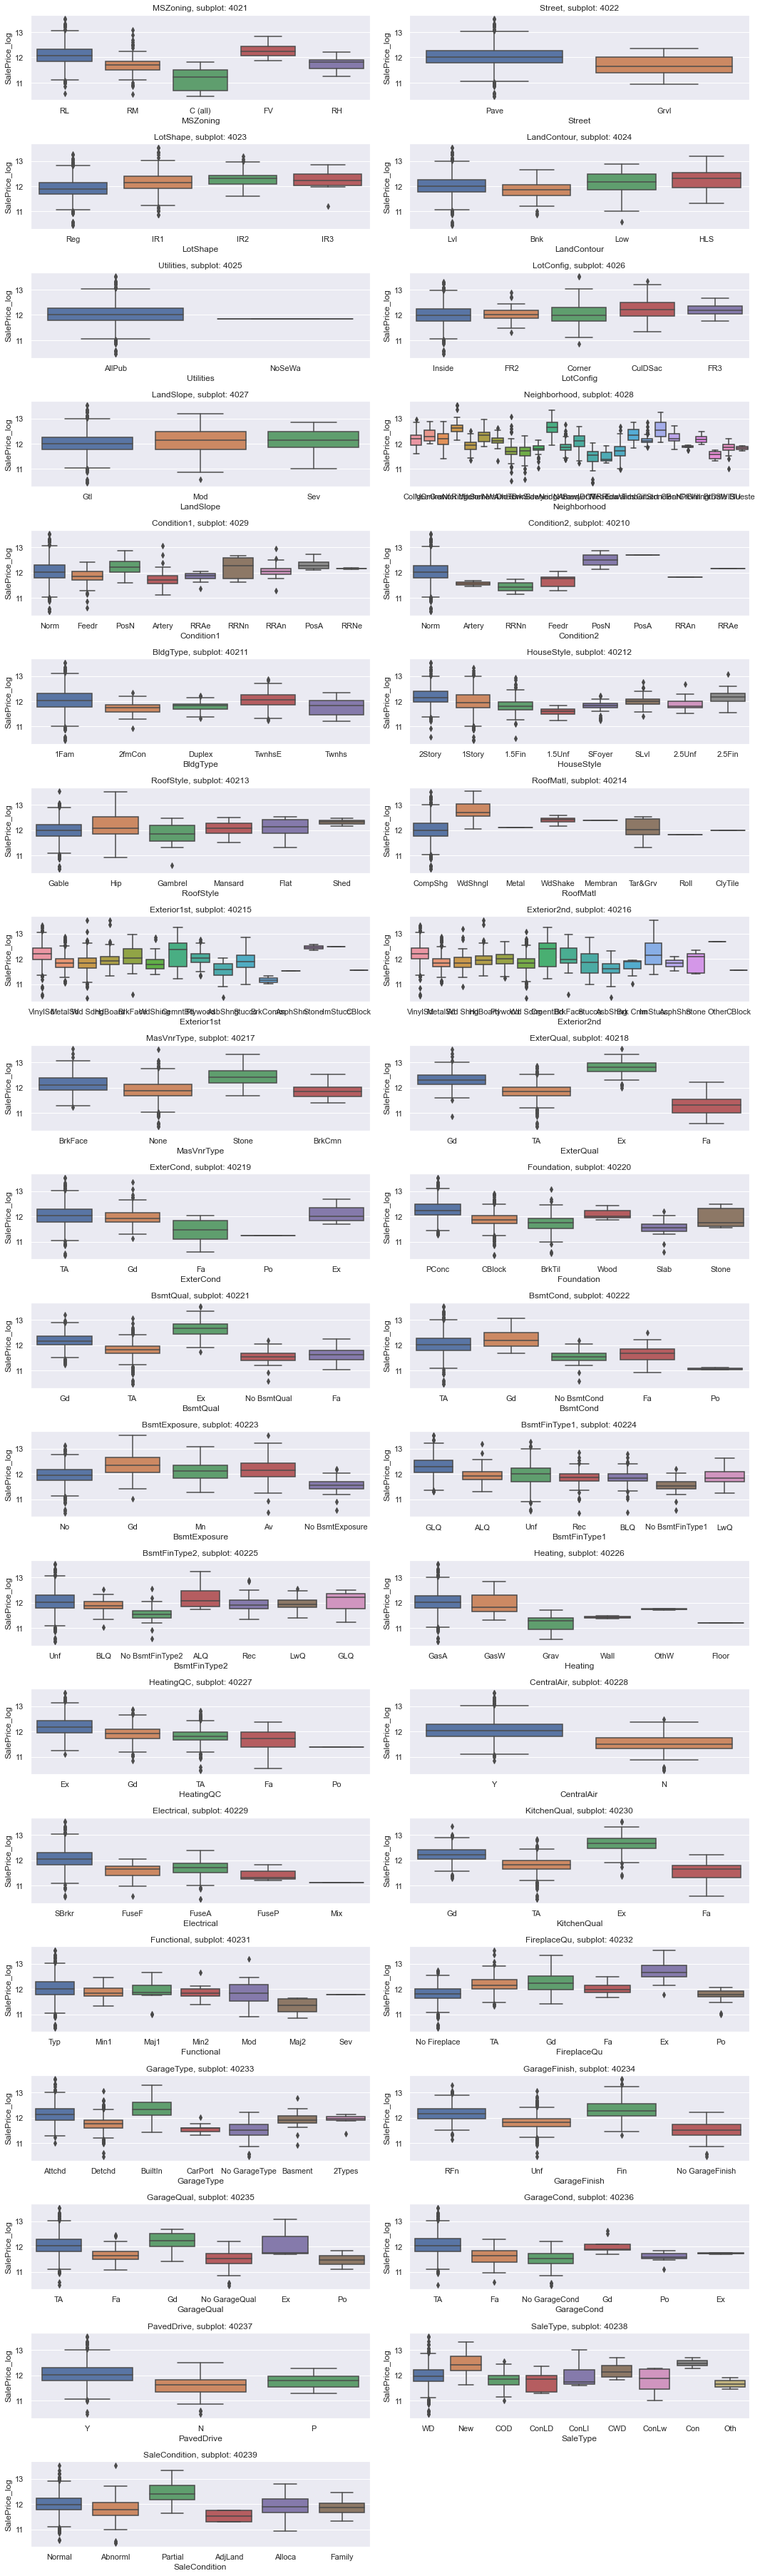

In [398]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_df[i], cat_df['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Creating Dummy Variables

In [399]:
#convert categorical variable into dummy
cat_df_f = pd.get_dummies(cat_df,drop_first = True)

In [400]:
cat_df_f.shape

(1460, 211)

In [401]:
cat_df_f.head()

,SalePrice_log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.2477,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0

In [402]:
cat_df_f = cat_df_f.drop('SalePrice_log', axis=1)

In [403]:
df_total =  pd.concat([cat_df_f,num_data],axis=1)
df_total.shape

(1460, 247)

In [404]:
df_total.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log

### Training and Test Data Preparation

In [405]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 246)
y shape (1460,)


In [406]:
print('X shape',X.shape)

X shape (1460, 246)


In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

print('X train shape',X_train.shape)
print('X test shape',X_train.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

# Modelling

## Ridge Regression

In [408]:
lm_ridge=Ridge() # Ridge Regression

parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)
lm_ridge_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 1} 0.8267522667958775


In [409]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=1)

In [410]:
lm_ridge_best_gcv.fit(X_train,y_train)

Ridge(alpha=1)

In [411]:
print(lm_ridge_best_gcv.coef_)

[ 1.00260395e-01  1.11075049e-01  8.61582007e-02  4.79329976e-02
  5.03364350e-03  3.67573138e-02 -6.17361884e-02 -2.77094812e-03
  8.78830451e-02  2.13167880e-02  8.80093944e-02 -1.56449072e-01
  2.87199572e-02 -2.84694510e-02 -5.32724980e-02 -1.34506820e-02
  2.20920542e-02 -6.18340304e-02 -4.32106424e-02 -4.88140747e-02
 -8.61005037e-03  4.04640068e-02 -1.18875596e-02  1.12039134e-01
 -9.82341759e-02 -2.07268528e-02 -4.60903377e-02 -1.50328454e-01
 -3.98763518e-02 -4.93604283e-02 -5.74204378e-03 -3.52258073e-02
  6.12326451e-02  1.30334041e-01 -7.09629120e-02 -3.20490183e-02
 -3.98979275e-02  9.93407672e-03  3.13522303e-02  1.73346552e-01
  1.00926276e-02  1.35036859e-02  6.12441469e-03  6.93744543e-02
  2.94356116e-02  4.55267582e-02 -2.26916783e-02  4.84880154e-02
 -7.29127535e-03  7.30040283e-02  7.80712248e-02  4.55712346e-02
  1.13689405e-01 -3.40736520e-01 -3.52356299e-02  0.00000000e+00
  1.43511902e-02  5.93365550e-02  9.44044493e-03 -7.25673964e-02
 -6.30674418e-02  2.70368

In [412]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)

In [413]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv)))) 

Root Mean Square Error train = 0.09939322518900394
Root Mean Square Error test = 0.15012245568785376


In [414]:
print("R-Square for training data",lm_ridge_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_ridge_best_gcv.score(X_test,y_test))

R-Square for training data 0.9325885307555586
R-Square for testing data 0.8807512976217985


### Top 5 Features of Ridge Regression

In [415]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Ridge'] = lm_ridge_best_gcv.coef_
model_coeff.sort_values(by='Ridge', ascending=False).head(5)

,Ridge
RoofMatl_WdShngl,0.2542
RoofMatl_CompShg,0.1889
Neighborhood_StoneBr,0.1733
RoofMatl_Membran,0.1374
Neighborhood_NridgHt,0.1303


## Lasso Regression

In [416]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}
lm_lasso_grd = GridSearchCV(estimator=lm_lasso,param_grid=parameters)
lm_lasso_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.8416796415035123


In [417]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.001)

In [418]:
lm_lasso_best_gcv.fit(X_train,y_train)

Lasso(alpha=0.001)

In [419]:
print(lm_lasso_best_gcv.coef_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.46851682e-02
 -0.00000000e+00  6.49155532e-03 -0.00000000e+00 -4.44397139e-03
  8.71762615e-03  0.00000000e+00  4.14872125e-02 -0.00000000e+00
  3.02887798e-02 -0.00000000e+00 -0.00000000e+00 -2.75162951e-03
  1.36274517e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.04046441e-03  3.55394365e-03 -0.00000000e+00  1.27420452e-01
 -5.19287948e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.00314826e-02  1.07430931e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.99967375e-02  1.12456827e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.92696036e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05836836e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.73781604e-03 -0.00000000e+00 -1.06922816e-02
 -0.00000000e+00  0.00000

In [420]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)

In [421]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv)))) 

Root Mean Square Error train = 0.11831788480707975
Root Mean Square Error test = 0.1500872423825331


In [422]:
print("R-Square for training data",lm_lasso_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_lasso_best_gcv.score(X_test,y_test))

R-Square for training data 0.9044741258388409
R-Square for testing data 0.8808072339367663


In [423]:
model_coefficients['Lasso (alpha=0.001)'].sort_values()

BsmtExposure_No BsmtExposure   -0.0747
MSZoning_RM                    -0.0647
Neighborhood_Edwards           -0.0519
BsmtFinType1_Unf               -0.0505
Condition2_PosN                -0.0306
HeatingQC_Fa                   -0.0195
FireplaceQu_No Fireplace       -0.0194
BsmtExposure_No                -0.0188
HouseStyle_2Story              -0.0175
KitchenQual_TA                 -0.0163
Exterior2nd_Stucco             -0.0129
HeatingQC_TA                   -0.0116
RoofStyle_Gable                -0.0112
BldgType_Twnhs                 -0.0107
Exterior1st_HdBoard            -0.0105
KitchenQual_Gd                 -0.0085
ExterQual_TA                   -0.0059
YrSold                         -0.0049
LotShape_Reg                   -0.0044
GarageFinish_Unf               -0.0034
LotConfig_Inside               -0.0028
LotFrontage                    -0.0008
MSSubClass                     -0.0007
PoolArea                       -0.0003
GarageYrBlt                    -0.0003
BsmtFinSF1               

### Top 5 Features of Lasso Regression

In [424]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Lasso'] = lm_lasso_best_gcv.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
Neighborhood_Crawfor,0.1274
Neighborhood_StoneBr,0.1125
Neighborhood_NridgHt,0.1074
OverallQual,0.0665
GarageCars,0.0654


## The Coefficient values for Ridge and Lasso Regressions

In [425]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=1.0)'] = lm_ridge_best_gcv.coef_
model_coefficients['Lasso (alpha=0.001)'] = lm_lasso_best_gcv.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=1.0),Lasso (alpha=0.001)
MSZoning_FV,0.1003,0.0000
MSZoning_RH,0.1111,0.0000
MSZoning_RL,0.0862,0.0000
MSZoning_RM,0.0479,-0.0647
Street_Pave,0.0050,-0.0000
LotShape_IR2,0.0368,0.0065
LotShape_IR3,-0.0617,-0.0000
LotShape_Reg,-0.0028,-0.0044
LandContour_HLS,0.0879,0.0087
LandContour_Low,0.0213,0.0000


## Conclusion

***Both Ridge Regression and Lasso Regression are working pretty similar. But the difference between Training score and Test score is less in Lasso Regression. So, We can go ahead with Lasso Regression***

# Subjective Questions

### Question 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [426]:
lm_lasso_grd_q1 = lm_lasso_grd

In [427]:
lm_lasso_grd_q1.best_estimator_.alpha

0.001

In [428]:
lm_lasso_grd_q1.best_estimator_.alpha *= 2

In [429]:
lm_lasso_grd_q1.best_estimator_

Lasso(alpha=0.002)

In [430]:
lm_lasso_best_gcv_q1 = lm_lasso_grd_q1.best_estimator_
lm_lasso_best_gcv_q1

Lasso(alpha=0.002)

In [431]:
lm_lasso_best_gcv_q1.fit(X_train,y_train)

Lasso(alpha=0.002)

In [432]:
print(lm_lasso_best_gcv_q1.coef_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.54712140e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.02368581e-03
  0.00000000e+00 -0.00000000e+00  1.56152795e-02 -0.00000000e+00
  1.18858375e-02 -0.00000000e+00 -0.00000000e+00 -1.28717560e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  9.19900814e-02
 -3.91616145e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  6.57033531e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.57321096e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.30276519e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000

In [433]:
y_pred_train_lasso_gcv_q1 = lm_lasso_best_gcv_q1.predict(X_train)
y_pred_test_lasso_gcv_q1 =  lm_lasso_best_gcv_q1.predict(X_test)

In [434]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv_q1))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv_q1)))) 

Root Mean Square Error train = 0.1267878040328884
Root Mean Square Error test = 0.1505142944985968


In [435]:
print("R-Square for training data",lm_lasso_best_gcv_q1.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_lasso_best_gcv_q1.score(X_test,y_test))

R-Square for training data 0.8903079415800987
R-Square for testing data 0.880127976476692


In [436]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Lasso'] = lm_lasso_best_gcv_q1.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
Neighborhood_Crawfor,0.0920
OverallQual,0.0738
Neighborhood_NridgHt,0.0657
GarageCars,0.0594
Condition1_Norm,0.0430


In [437]:
lm_ridge_grd.best_estimator_.alpha

1

In [438]:
lm_ridge_grd.best_estimator_.alpha *=2

In [439]:
lm_ridge_grd.best_estimator_.alpha

2

In [440]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=2)

In [441]:
lm_ridge_best_gcv.fit(X_train,y_train)

Ridge(alpha=2)

In [442]:
print(lm_ridge_best_gcv.coef_)

[ 6.62765205e-02  7.12530873e-02  5.40760797e-02  1.04550908e-02
  5.78343169e-03  3.67888852e-02 -5.64402444e-02 -3.87639970e-03
  8.33317954e-02  1.52097108e-02  8.52365993e-02 -9.58569182e-02
  2.86659450e-02 -2.66466835e-02 -4.10504496e-02 -1.22559243e-02
  2.50166614e-02 -4.45286154e-02 -2.69350936e-02 -3.61831421e-02
 -3.94091458e-04  4.09746761e-02 -1.15365554e-02  1.13022572e-01
 -9.18579630e-02 -2.21520355e-02 -3.58696130e-02 -1.22039349e-01
 -3.69678051e-02 -4.33422639e-02 -5.56376651e-03 -2.97373254e-02
  5.99880598e-02  1.25682353e-01 -5.99675852e-02 -2.78705609e-02
 -3.48019136e-02  8.21319411e-03  3.20106081e-02  1.61280773e-01
  5.46053864e-03  1.31848151e-02 -3.76811069e-04  6.27314807e-02
  1.81311416e-02  2.51495305e-02 -2.54319061e-02  4.00863733e-02
 -8.68458997e-03  5.37695333e-02  5.91093799e-02  5.19930240e-02
  7.54992122e-02 -2.37768321e-01 -1.87656896e-02  0.00000000e+00
  1.23337964e-02  5.63774539e-02  9.68812951e-03 -6.84568039e-02
 -5.78535171e-02  2.38327

In [443]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)

In [444]:
print("R-Square for training data",lm_ridge_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_ridge_best_gcv.score(X_test,y_test))

R-Square for training data 0.9295848635924313
R-Square for testing data 0.8800096053970825


In [445]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Ridge'] = lm_ridge_best_gcv.coef_
model_coeff.sort_values(by='Ridge', ascending=False).head(5)

,Ridge
RoofMatl_WdShngl,0.1618
Neighborhood_StoneBr,0.1613
Neighborhood_NridgHt,0.1257
RoofMatl_CompShg,0.1134
Neighborhood_Crawfor,0.1130


### Question 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [450]:
X = df_total.drop(['Neighborhood_Crawfor','Neighborhood_StoneBr','Neighborhood_NridgHt','OverallQual','GarageCars'],axis =1)
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 241)
y shape (1460,)


In [451]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [452]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}
lm_lasso_grd = GridSearchCV(estimator=lm_lasso,param_grid=parameters)
lm_lasso_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.7951281139829


In [453]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.001)

In [454]:
lm_lasso_best_gcv.fit(X_train,y_train)

Lasso(alpha=0.001)

In [455]:
print(lm_lasso_best_gcv.coef_)

[ 0.00000000e+00  0.00000000e+00  5.80756526e-03 -6.50956245e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.50815199e-04
  7.85605707e-02 -0.00000000e+00  5.26151736e-02 -0.00000000e+00
  1.30342947e-02 -0.00000000e+00  0.00000000e+00 -7.45029188e-03
  7.43807499e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.26543460e-02 -1.02052612e-01
 -1.80969770e-02 -0.00000000e+00 -9.98680578e-02 -0.00000000e+00
 -2.10284942e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -4.85456737e-03 -0.00000000e+00 -1.35970912e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -6.76991385e-03
  6.00222105e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.15232359e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.65412268e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

In [456]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)

In [457]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv)))) 

Root Mean Square Error train = 0.13041020908880838
Root Mean Square Error test = 0.16130822469147396


In [458]:
print("R-Square for training data",lm_lasso_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_lasso_best_gcv.score(X_test,y_test))

R-Square for training data 0.8839504638566849
R-Square for testing data 0.862318570956565


In [459]:
model_coefficients['Lasso (alpha=0.001)'].sort_values()

BsmtExposure_No BsmtExposure   -0.0747
MSZoning_RM                    -0.0647
Neighborhood_Edwards           -0.0519
BsmtFinType1_Unf               -0.0505
Condition2_PosN                -0.0306
HeatingQC_Fa                   -0.0195
FireplaceQu_No Fireplace       -0.0194
BsmtExposure_No                -0.0188
HouseStyle_2Story              -0.0175
KitchenQual_TA                 -0.0163
Exterior2nd_Stucco             -0.0129
HeatingQC_TA                   -0.0116
RoofStyle_Gable                -0.0112
BldgType_Twnhs                 -0.0107
Exterior1st_HdBoard            -0.0105
KitchenQual_Gd                 -0.0085
ExterQual_TA                   -0.0059
YrSold                         -0.0049
LotShape_Reg                   -0.0044
GarageFinish_Unf               -0.0034
LotConfig_Inside               -0.0028
LotFrontage                    -0.0008
MSSubClass                     -0.0007
PoolArea                       -0.0003
GarageYrBlt                    -0.0003
BsmtFinSF1               

In [460]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Lasso'] = lm_lasso_best_gcv.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
Functional_Typ,0.0847
LandContour_HLS,0.0786
SaleType_New,0.0662
Condition1_Norm,0.0600
Exterior1st_BrkFace,0.0594
